**Checking the quality of the test set**

In [1]:
%matplotlib inline
import pandas as pd

In [4]:
dataset = pd.read_csv('../GenericClassifier_re_evaluation_2.txt', sep='\t', header=None,
                      names=['verified_label', 'label', '?', 'input'])

In [7]:
dataset.sample(10)

,verified_label,label,?,input
632,VER_SPE,SPE,1,Biocor Instituto
4737,VER_SPE,SPE,1,Henan Institute of Chemistry
5107,VER_SPE,SPE,1,Inctityt ximicheckoi fiziki AH
1540,VER_GEN,SPE,1,CITERES
4743,VER_SPE,SPE,2,Henderson Busby Int
7288,VER_SPE,SPE,1,Milton S. Hershey Med. Cent.
3049,VER_GEN,GEN,1,"Dept. of Applied Mathematics, Biometrics and P..."
5464,VER_GEN,GEN,1,Institute for Experimental Medicine
7248,VER_SPE,SPE,1,"Mexicana de Cananea, S.A. de C.V."
5835,VER_SPE,SPE,1,Instituto Oswaldo Cruz-Fiocruz


In [3]:
dataset.sample(40).input.values

array(['Dept. Anthropol.', 'CEA, Saclay',
       'Liaoning Entry-Exit Inspection and Quarantine Bureau',
       'Department of Internal Medicine I and Clinical Chemistry',
       'Institut Universitari IVI', 'Leigh Marine Laboratory',
       'Department of Medicine, Pediatrics and Radiology',
       'Dept. of Electrical Material and Device Eng.',
       'Laboratory of Molecular Surgical Research',
       'Acad. Med. Sci. USSR', 'ILO', 'National Sun Yat-sen University',
       'Drexel University', 'Center for Forest Protection',
       'Nanchang Hangkong University', 'Laboratory of Plant Genecology',
       'K-JIST', 'Ithaca College', 'Lab. Genet. Molec. M.',
       "Children's Hospital of Alabama", 'Geological Survey of Japan',
       'Federal University of Rio Grande do Norte', 'Akron City Hospital',
       'Aga Khan University',
       'Institute of Systems, Information Technologies and Nanotechnologies (ISIT)',
       'Center for Chemical Physics', 'IBM', 'CERN',
       'Academy of 

# Languages

- English (majority)
- French: Laboratoire de Géologie
- Spanish/Portugese/Catalan: Instituto de Química, Laboratório Nacional de Luz Síncrotron, Departament de Química Analítica i Química Orgànica
- Dutch/German: "Chirurgische Klinik und Poliklinik", "Klinikum Süd, Nuremberg", "Humboldt-Universität zu Berlin", "ACTA-Vrije Universiteit, Amsterdam"
- Nordic (Finish/Danish/Norwegian): Farmasøytisk institutt
- Turkish: Atatürk University, Koç University
- Hungarian: Eötvös University
- Polish: Kliniki Chorób Wewnetrznych i Zawodowych Sl. AM w Katowicach
- Greek: Laïko Hospital, Athens

# Variations and typos

- Typos: 
    - Comma instead of dot: "Dept, Electrical and Computer Engineering"
- Abbreviation in non-English languages:
    - "Dpto. Física"

# Check the length of the strings

In [4]:
dataset['input_len'] = dataset.input.apply(len)

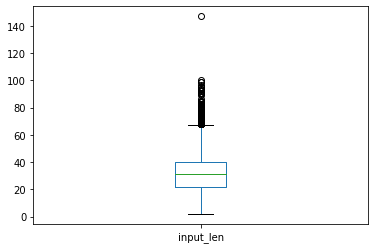

In [5]:
dataset.input_len.plot.box()

## Look at longer strings

In [6]:
dataset.input[dataset.input_len >= 60].values

array(['A. N. Severtsov Institute of Evolutionary Morphology and Ecology',
       'Academic Institute of Linguistics, Iorgu Iordan – Al. Rosetti',
       'Agricultural Research Service United States Department of Agriculture',
       'American Steamship Owners Mutual Protection and Indemnity Association, INC.',
       'Amsterdam Institute for Metropolitan and International Development Studies (AMIDSt)',
       'Anhui Provincial Key Laboratory of Civil Engineering and Materials',
       'APPA, Association Pour la Prévention de la Pollution Atmosphérique',
       'Arnold and Marie Schwartz College of Pharmacy and Health Sciences',
       'ASTAR Institute of Materials Research and Engineering (IMRE)',
       'Azorean Biodiversity Group and Platform for Enhancing Ecological Research and Sustainability',
       "Banat's University of Agricultural Sciences and Veterinary Medicine, Timişoara",
       'Bangladesh Institute of Research for Promotion of Essential and Reproductive Health and T

In [7]:
dataset.input[dataset.input_len >= 140].values

array(["Department of Oral Mucosal Diseases Shanghai Key Laboratory of Stomatology Ninth People's Hospital Shanghai Jiao Tong University School of Medicine"],
      dtype=object)

# Look at shorter strings

In [8]:
dataset.input[dataset.input_len < 15].values

array(['(EMBL-EBI)', '(GWC)2', '301 Hospital', '3M Center', '3M Co.',
       'A.E.R.E.', 'A/S Dumex', 'AAAS', 'Aberdeen U.', 'Abt.Melchers',
       'Acad Sinica', 'ACCOAT A/S', 'ACell, Inc.', 'ACM', 'ADAS',
       'Adobe Research', 'AdW der DDR', 'AECS', 'AFMB', 'AFSSA Nancy',
       'Agere Systems', 'AGO Department', 'AgResearch', 'Agric. Chem.',
       'AgroParisTech', 'AHEP Group', 'AIIMS', 'AIM', 'AIST',
       'Al Hammrania', 'Alcatel-Lucent', 'Alfred Univ', 'Allergan, Inc.',
       'AMO Gmbh', 'Amok Ltd.', 'AMR', 'Andritz Inc.', 'ANSES',
       'AOU Meyer', 'AP Agric.Univ.', 'AP-HM', 'Apotheke', 'ARS', 'ASCR',
       'ASGC', 'Astra AB', 'Astra Zeneca', 'ASTRON', 'AT and T',
       'AT&T Bell Lab', 'ATILH', 'Atlántida', 'Augenheilkunde',
       'Avitar Inc.', 'AZ Nikolaas', 'Azienda USL', 'AZTI-Tecnalia',
       'Balzers AG', 'Bank of Greece', 'Bard College', 'BASF AG',
       'BASF SE', 'BAYER', 'Baylor Univ.', 'Beech Brook', 'Behrend Coll',
       'Bellcore', 'BHI-Centrilift', 

# Look for numbers and special characters

In [9]:
dataset['special'] = dataset.input.str.replace(' |\.', '').str.contains(r'\W|\d')

In [10]:
_ = dataset[dataset.special].input.apply(print)

(EMBL-EBI)
(GWC)2
‘Carol Davila’ University of Medicine and Pharmacy
20/20 Laboratory for Fuel Cells and Green Energy RDandD
22 State University of New York at Albany
25 State Research Institute of Chemmotology
2Nd Medical Clinic
301 Hospital
302 Military Hospital
3D Microphotonics Project
3Department of Cardiac Surgery
3M Center
3M Co.
3M Occupational Health and Environmental Safety Division
3rd Department of Surgery
424 General Military Hospital
95949 Unit PLA, AF
A. F. Ioffe Phys.-Tech. Inst. R.
A. F. Physico-Technical Institute RAS
A. Meyer University Children’s Hospital
A.F. Ioffe Physical-Technical Institute
A/S Dumex
Aarhus University Hospital - Skejby
Abt. Thorax-/Herz-, Gefachirurgie
Abteilung für Klinische Neurophysiologie
Abteilung für Nuklearmedizin
Abteilung Kariologie/Endodontologie
Abteilung Röntgendiagnostik
Academic Institute of Linguistics, Iorgu Iordan – Al. Rosetti
Academy of Sciences, the USSR
ACCOAT A/S
ACell, Inc.
ACTA-Vrije Universiteit, Amsterdam
Addenbrooke